In [4]:
import pandas as pd
import numpy as np

import statsmodels.tsa.api as smt
from statsmodels.tsa.seasonal import seasonal_decompose  # Decomposition
from stldecompose import decompose, forecast             # Decomposition & forecasting
#from statsmodels.tsa.holtwinters import ExponentialSmoothing #ETS Models
from statsmodels.tsa.stattools import adfuller
#from fbprophet import Prophet #you need to install fbprophet using pip install

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
sales_data = pd.read_csv("Tractor-Sales.csv")
sales_data.head(5)

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203


In [6]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month-Year                144 non-null object
Number of Tractor Sold    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


## Converting normal data into Time Series data

In [7]:
date_range_val = pd.date_range(start='2003-01-01', freq='MS', periods=len(sales_data))

In [8]:
sales_data.set_index(date_range_val, inplace=True)

In [9]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 2003-01-01 to 2014-12-01
Freq: MS
Data columns (total 2 columns):
Month-Year                144 non-null object
Number of Tractor Sold    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 3.4+ KB


In [10]:
import calendar
sales_data['Month'] = date_range_val.month
sales_data['Month'] = sales_data['Month'].apply(lambda x: calendar.month_abbr[x])
sales_data['Year'] = date_range_val.year

In [11]:
sales_data

,Month-Year,Number of Tractor Sold,Month,Year
2003-01-01,Jan-03,141,Jan,2003
2003-02-01,Feb-03,157,Feb,2003
2003-03-01,Mar-03,185,Mar,2003
2003-04-01,Apr-03,199,Apr,2003
2003-05-01,May-03,203,May,2003
...,...,...,...,...
2014-08-01,Aug-14,848,Aug,2014
2014-09-01,Sep-14,640,Sep,2014
2014-10-01,Oct-14,581,Oct,2014
2014-11-01,Nov-14,519,Nov,2014


In [12]:
sales_data['2012']

,Month-Year,Number of Tractor Sold,Month,Year
2012-01-01,Jan-12,428,Jan,2012
2012-02-01,Feb-12,423,Feb,2012
2012-03-01,Mar-12,507,Mar,2012
2012-04-01,Apr-12,536,Apr,2012
2012-05-01,May-12,610,May,2012
2012-06-01,Jun-12,609,Jun,2012
2012-07-01,Jul-12,687,Jul,2012
2012-08-01,Aug-12,707,Aug,2012
2012-09-01,Sep-12,509,Sep,2012
2012-10-01,Oct-12,452,Oct,2012


In [13]:
sales_data.columns = ['Month_Year', 'Tractor_Sales', 'Month', 'Year']

In [14]:
sales_data.drop(['Month_Year'], axis=1, inplace=True)

In [15]:
sales_data.head()

,Tractor_Sales,Month,Year
2003-01-01,141,Jan,2003
2003-02-01,157,Feb,2003
2003-03-01,185,Mar,2003
2003-04-01,199,Apr,2003
2003-05-01,203,May,2003


In [16]:
ts = sales_data.Tractor_Sales

In [17]:
ts

2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
             ... 
2014-08-01    848
2014-09-01    640
2014-10-01    581
2014-11-01    519
2014-12-01    605
Freq: MS, Name: Tractor_Sales, Length: 144, dtype: int64

## Understanding Data

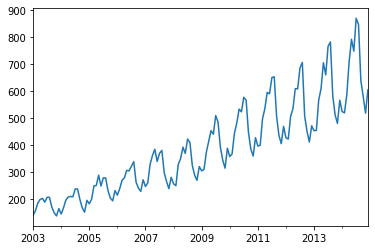

In [18]:
ts.plot()

Text(0, 0.5, 'Tractor Sales')

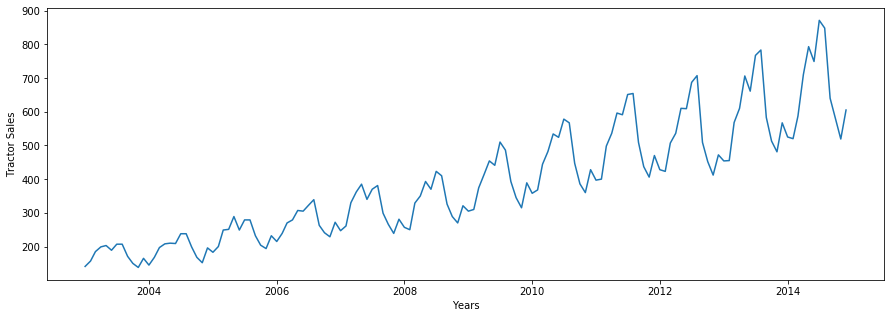

In [19]:
plt.figure(figsize=(15, 5))
plt.plot(ts)
plt.xlabel('Years')
plt.ylabel('Tractor Sales')

In [36]:
sales_data

,Tractor_Sales,Month,Year
2003-01-01,141,Jan,2003
2003-02-01,157,Feb,2003
2003-03-01,185,Mar,2003
2003-04-01,199,Apr,2003
2003-05-01,203,May,2003
...,...,...,...
2014-08-01,848,Aug,2014
2014-09-01,640,Sep,2014
2014-10-01,581,Oct,2014
2014-11-01,519,Nov,2014


In [20]:
monthly_sales_data = pd.pivot_table(sales_data, values = "Tractor_Sales", columns = "Year", index = "Month")
monthly_sales_data = monthly_sales_data.reindex(index = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
monthly_sales_data

Year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Month,,,,,,,,,,,,
Jan,141,145,183,215,247,257,305,358,397,428,454,525
Feb,157,168,200,239,261,250,310,368,400,423,455,520
Mar,185,197,249,270,330,329,374,444,498,507,568,587
Apr,199,208,251,279,362,350,414,482,536,536,610,710
May,203,210,289,307,385,393,454,534,596,610,706,793
Jun,189,209,249,305,340,370,441,524,591,609,661,749
Jul,207,238,279,322,370,423,510,578,651,687,767,871
Aug,207,238,279,339,381,410,486,567,654,707,783,848
Sep,171,199,232,263,299,326,393,447,509,509,583,640


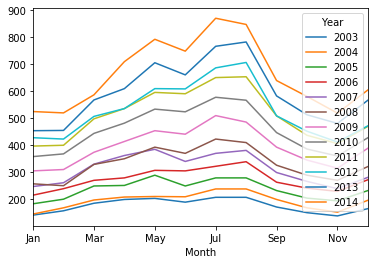

In [21]:
monthly_sales_data.plot()

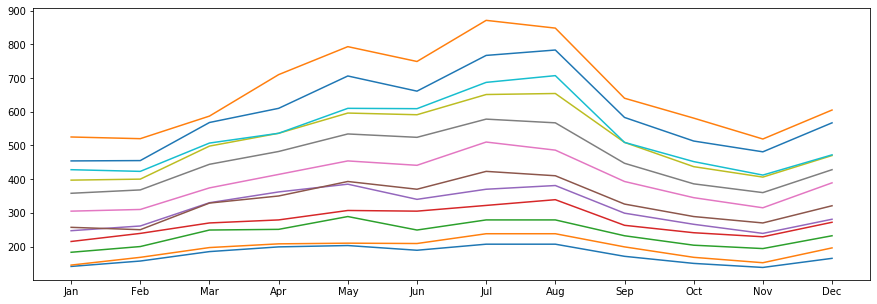

In [22]:
plt.figure(figsize=(15, 5))
plt.plot(monthly_sales_data)

In [23]:
yearly_sales_data = pd.pivot_table(sales_data, values = "Tractor_Sales", columns = "Month", index = "Year")
yearly_sales_data = yearly_sales_data[['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
yearly_sales_data

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2003,141,157,185,199,203,189,207,207,171,150,138,165
2004,145,168,197,208,210,209,238,238,199,168,152,196
2005,183,200,249,251,289,249,279,279,232,204,194,232
2006,215,239,270,279,307,305,322,339,263,241,229,272
2007,247,261,330,362,385,340,370,381,299,266,239,281
2008,257,250,329,350,393,370,423,410,326,289,270,321
2009,305,310,374,414,454,441,510,486,393,345,315,389
2010,358,368,444,482,534,524,578,567,447,386,360,428
2011,397,400,498,536,596,591,651,654,509,437,406,470


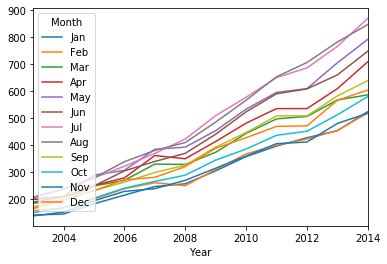

In [24]:
yearly_sales_data.plot()

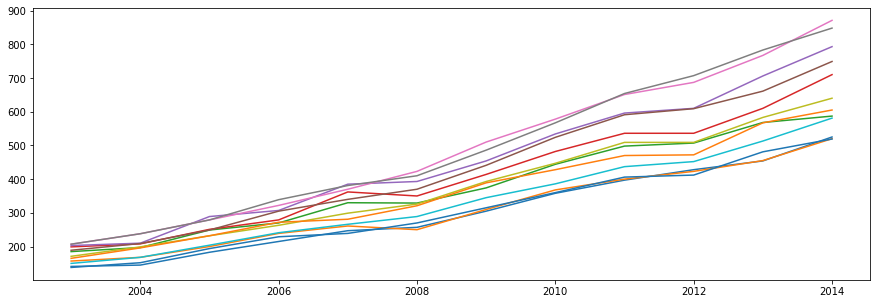

In [25]:
plt.figure(figsize=(15, 5))
plt.plot(yearly_sales_data)

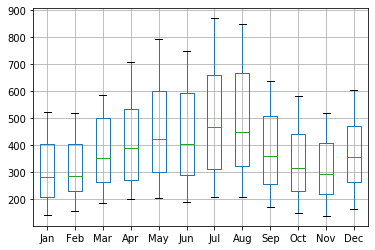

In [26]:
yearly_sales_data.boxplot()

## Decomposition

In [27]:
decompose = seasonal_decompose(ts, model='multiplicative', two_sided=False, extrapolate_trend=4)

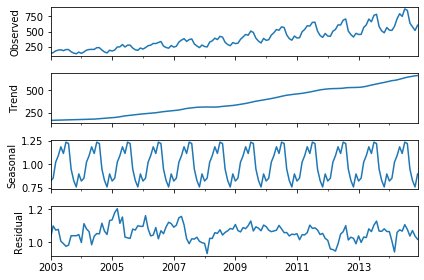

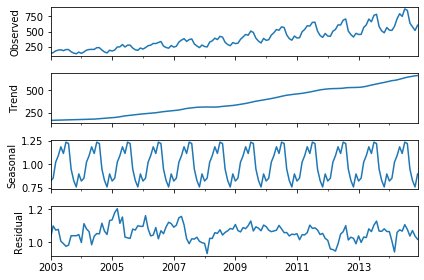

In [28]:
decompose.plot()

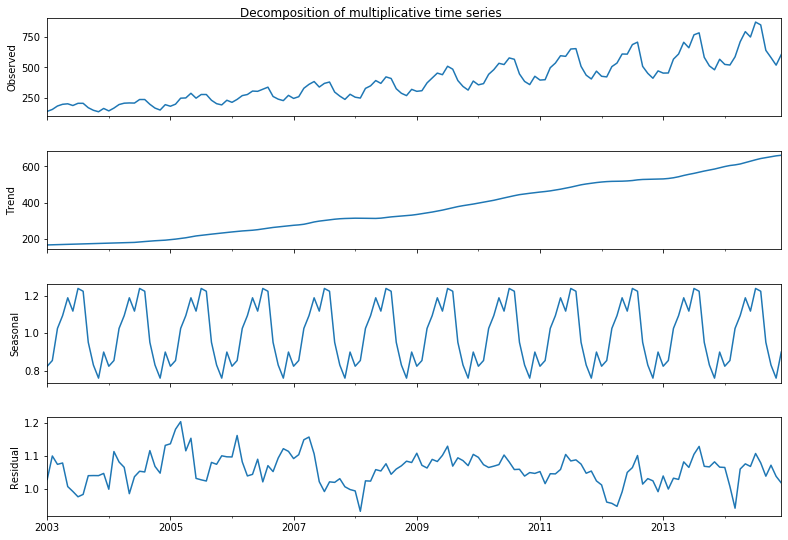

In [29]:
fig = decompose.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of multiplicative time series')
plt.show()

In [33]:
decompose_data = pd.concat([decompose.trend, decompose.seasonal, decompose.resid, decompose.observed],axis=1)
decompose_data.columns = ['Trend', 'SI', "Irregular", "Actual"]

In [34]:
decompose_data

,Trend,SI,Irregular,Actual
2003-01-01,166.408333,0.823508,1.028907,141
2003-02-01,167.216667,0.853891,1.099557,157
2003-03-01,168.025000,1.024830,1.074350,185
2003-04-01,168.833333,1.092962,1.078424,199
2003-05-01,169.641667,1.187805,1.007438,203
...,...,...,...,...
2014-08-01,642.875000,1.222687,1.078833,848
2014-09-01,647.958333,0.950868,1.038754,640
2014-10-01,653.166667,0.829943,1.071776,581
2014-11-01,657.583333,0.760143,1.038297,519


In [41]:
from stldecompose import decompose, forecast
from stldecompose.forecast_funcs import naive, drift, mean, seasonal_naive

In [42]:
ts

2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
             ... 
2014-08-01    848
2014-09-01    640
2014-10-01    581
2014-11-01    519
2014-12-01    605
Freq: MS, Name: Tractor_Sales, Length: 144, dtype: int64

In [43]:
train = ts[:'2014-06-01']
test = ts['2014-07-01':]

In [44]:
train

2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
             ... 
2014-02-01    520
2014-03-01    587
2014-04-01    710
2014-05-01    793
2014-06-01    749
Freq: MS, Name: Tractor_Sales, Length: 138, dtype: int64

In [45]:
test

2014-07-01    871
2014-08-01    848
2014-09-01    640
2014-10-01    581
2014-11-01    519
2014-12-01    605
Freq: MS, Name: Tractor_Sales, dtype: int64

In [46]:
decomp = decompose(train, period=12)

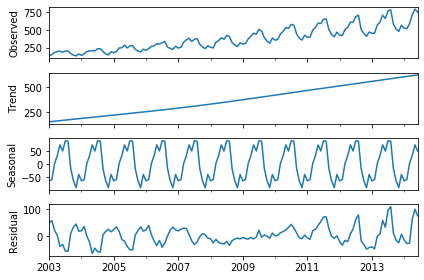

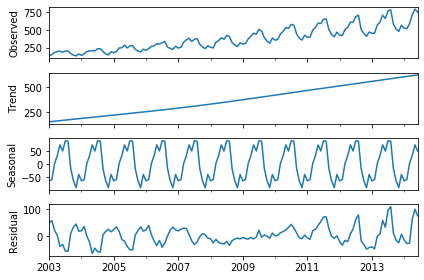

In [47]:
decomp.plot()

In [48]:
fcast = forecast(decomp, steps=6, fc_func =drift ,seasonal=True)

In [49]:
fcast

,drift+seasonal
2014-07-02,716.038863
2014-08-02,718.125634
2014-09-02,616.651714
2014-10-03,573.352222
2014-11-03,550.506493
2014-12-04,605.119672


In [50]:
test

2014-07-01    871
2014-08-01    848
2014-09-01    640
2014-10-01    581
2014-11-01    519
2014-12-01    605
Freq: MS, Name: Tractor_Sales, dtype: int64

In [53]:
print('MAPE:', np.mean(np.abs(pd.Series(fcast.values.flat) -  pd.Series(test.values.flat))/ pd.Series(test.values.flat)))

MAPE: 0.07360237860400766


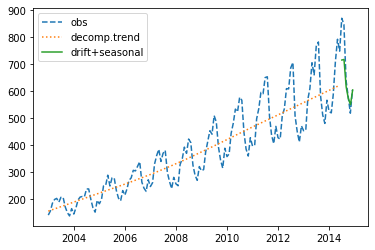

In [54]:
plt.plot(ts, '--', label='obs')
plt.plot(decomp.trend, ':', label='decomp.trend')
plt.plot(fcast, '-', label=fcast.columns[0])

plt.legend();

## Moving Average

In [55]:
ts

2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
             ... 
2014-08-01    848
2014-09-01    640
2014-10-01    581
2014-11-01    519
2014-12-01    605
Freq: MS, Name: Tractor_Sales, Length: 144, dtype: int64

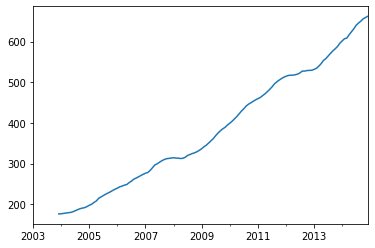

In [59]:
ts.rolling(window=12).mean().plot()

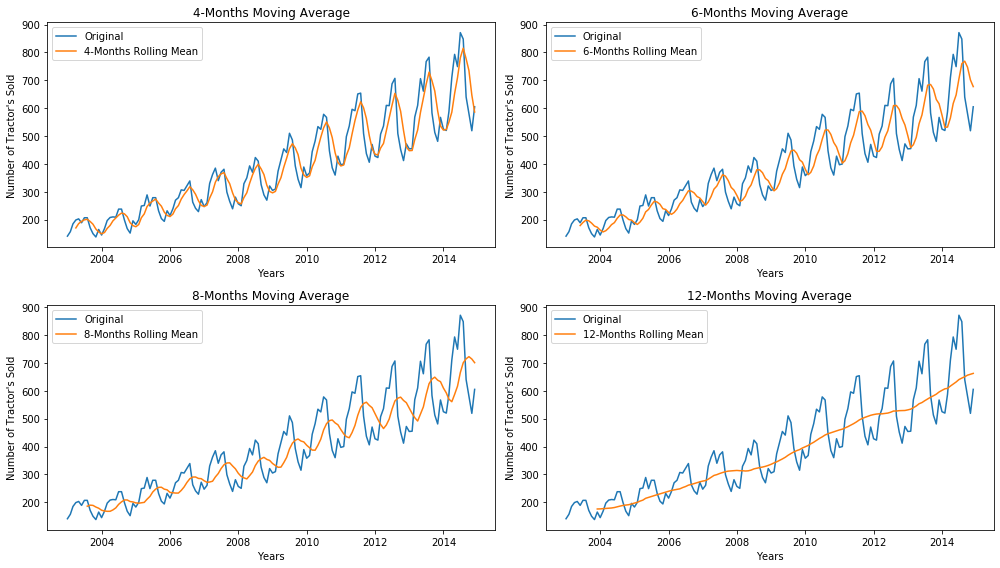

In [60]:
fig, axes = plt.subplots(2, 2, sharey=False, sharex=False)
fig.set_figwidth(14)
fig.set_figheight(8)

axes[0][0].plot(ts.index, ts, label='Original')
axes[0][0].plot(ts.index, ts.rolling(window=4).mean(), label='4-Months Rolling Mean')
axes[0][0].set_xlabel("Years")
axes[0][0].set_ylabel("Number of Tractor's Sold")
axes[0][0].set_title("4-Months Moving Average")
axes[0][0].legend(loc='best')

axes[0][1].plot(ts.index, ts, label='Original')
axes[0][1].plot(ts.index, ts.rolling(window=6).mean(), label='6-Months Rolling Mean')
axes[0][1].set_xlabel("Years")
axes[0][1].set_ylabel("Number of Tractor's Sold")
axes[0][1].set_title("6-Months Moving Average")
axes[0][1].legend(loc='best')

axes[1][0].plot(ts.index, ts, label='Original')
axes[1][0].plot(ts.index, ts.rolling(window=8).mean(), label='8-Months Rolling Mean')
axes[1][0].set_xlabel("Years")
axes[1][0].set_ylabel("Number of Tractor's Sold")
axes[1][0].set_title("8-Months Moving Average")
axes[1][0].legend(loc='best')

axes[1][1].plot(ts.index, ts, label='Original')
axes[1][1].plot(ts.index, ts.rolling(window=12).mean(), label='12-Months Rolling Mean')
axes[1][1].set_xlabel("Years")
axes[1][1].set_ylabel("Number of Tractor's Sold")
axes[1][1].set_title("12-Months Moving Average")
axes[1][1].legend(loc='best')

plt.tight_layout()
plt.show()

## ETS Models

In [66]:
### single exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [67]:
# our guessed parameters
alpha = 0.4
beta = 0.2
gamma = 0.01

# initialise model
ets_model = ExponentialSmoothing(train, trend='mul', seasonal='mul', seasonal_periods=12)
ets_fit = ets_model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)

In [68]:
fcast = ets_fit.forecast(steps=6)

In [69]:
fcast

2014-07-01    839.130271
2014-08-01    843.747907
2014-09-01    649.375967
2014-10-01    569.942747
2014-11-01    528.376090
2014-12-01    624.599284
Freq: MS, dtype: float64

In [71]:
print('MAPE:', np.mean(np.abs(test - fcast)/test))

MAPE: 0.020957772265926284


In [72]:
import auto_holtwinters_UDF

In [73]:
np.linspace(0,0.5,5)

array([0.   , 0.125, 0.25 , 0.375, 0.5  ])

In [78]:
auto_holtwinters_UDF.auto_hwm(ts, val_split_date = '2014-06-01', alpha = np.linspace(0,0.5,5), beta = np.linspace(0,0.5,5), gamma = np.linspace(0,0.5,5), trend='mul', seasonal='mul', periods=12, verbose=True)

Evaluating Exponential Smoothing model for 125 fits

Checking for {'alpha': 0.0, 'beta': 0.0, 'gamma': 0.0, 'phi': None}
Checking for {'alpha': 0.0, 'beta': 0.0, 'gamma': 0.125, 'phi': None}
Checking for {'alpha': 0.0, 'beta': 0.0, 'gamma': 0.25, 'phi': None}
Checking for {'alpha': 0.0, 'beta': 0.0, 'gamma': 0.375, 'phi': None}
Checking for {'alpha': 0.0, 'beta': 0.0, 'gamma': 0.5, 'phi': None}
Checking for {'alpha': 0.0, 'beta': 0.125, 'gamma': 0.0, 'phi': None}
Checking for {'alpha': 0.0, 'beta': 0.125, 'gamma': 0.125, 'phi': None}
Checking for {'alpha': 0.0, 'beta': 0.125, 'gamma': 0.25, 'phi': None}
Checking for {'alpha': 0.0, 'beta': 0.125, 'gamma': 0.375, 'phi': None}
Checking for {'alpha': 0.0, 'beta': 0.125, 'gamma': 0.5, 'phi': None}
Checking for {'alpha': 0.0, 'beta': 0.25, 'gamma': 0.0, 'phi': None}
Checking for {'alpha': 0.0, 'beta': 0.25, 'gamma': 0.125, 'phi': None}
Checking for {'alpha': 0.0, 'beta': 0.25, 'gamma': 0.25, 'phi': None}
Checking for {'alpha': 0.0, 'beta': 0

Checking for {'alpha': 0.5, 'beta': 0.375, 'gamma': 0.0, 'phi': None}
Checking for {'alpha': 0.5, 'beta': 0.375, 'gamma': 0.125, 'phi': None}
Checking for {'alpha': 0.5, 'beta': 0.375, 'gamma': 0.25, 'phi': None}
Checking for {'alpha': 0.5, 'beta': 0.375, 'gamma': 0.375, 'phi': None}
Checking for {'alpha': 0.5, 'beta': 0.375, 'gamma': 0.5, 'phi': None}
Checking for {'alpha': 0.5, 'beta': 0.5, 'gamma': 0.0, 'phi': None}
Checking for {'alpha': 0.5, 'beta': 0.5, 'gamma': 0.125, 'phi': None}
Checking for {'alpha': 0.5, 'beta': 0.5, 'gamma': 0.25, 'phi': None}
Checking for {'alpha': 0.5, 'beta': 0.5, 'gamma': 0.375, 'phi': None}
Checking for {'alpha': 0.5, 'beta': 0.5, 'gamma': 0.5, 'phi': None}


{'alpha': 0.125,
 'beta': 0.5,
 'gamma': 0.25,
 'phi': None,
 'mae': 0.014217806442324121}

In [75]:
# our guessed parameters
alpha = 0.125
beta = 0.5
gamma = 0.25

# initialise model
ets_model = ExponentialSmoothing(train, trend='mul', seasonal='mul', seasonal_periods=12)
ets_fit = ets_model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)

In [77]:
fcast = ets_fit.forecast(steps=6)

print('MAPE', np.mean(np.abs(test - fcast)/test))

MAPE 0.014610972755008805


### To check stationarity

In [79]:
adfuller(ts)

(1.1088250591467403,
 0.995291241524842,
 14,
 129,
 {'1%': -3.482087964046026,
  '5%': -2.8842185101614626,
  '10%': -2.578864381347275},
 1082.5357724796872)

In [80]:
adfuller(np.log(ts))

(-1.7324716814049712,
 0.41446449274910446,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 -446.8186692532702)

In [82]:
ts

2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
             ... 
2014-08-01    848
2014-09-01    640
2014-10-01    581
2014-11-01    519
2014-12-01    605
Freq: MS, Name: Tractor_Sales, Length: 144, dtype: int64

In [83]:
ts.diff(2)

2003-01-01      NaN
2003-02-01      NaN
2003-03-01     44.0
2003-04-01     42.0
2003-05-01     18.0
              ...  
2014-08-01     99.0
2014-09-01   -231.0
2014-10-01   -267.0
2014-11-01   -121.0
2014-12-01     24.0
Freq: MS, Name: Tractor_Sales, Length: 144, dtype: float64

In [86]:
adfuller(ts.diff(3).dropna())

(-2.936724468805426,
 0.04124108615678968,
 10,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 1066.9233840581205)

In [89]:
ln_sales_ts = np.log(ts)
adfuller(ln_sales_ts.diff(2).dropna())

(-3.200721566232404,
 0.01994295010546119,
 11,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 -434.9038941451596)

In [90]:
ln_sales_ts_diff2 = ln_sales_ts.diff(2).dropna()

In [91]:
# Ln_sales_ts_diff2 is stationary
# For ARIMA Model, your Yt = ln_sales_ts
# d = 2
# TO find the p,q values, you should create ACF & PACF of stationary series 

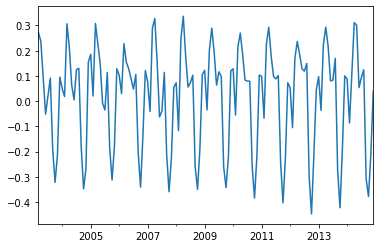

In [92]:
ln_sales_ts_diff2.plot()

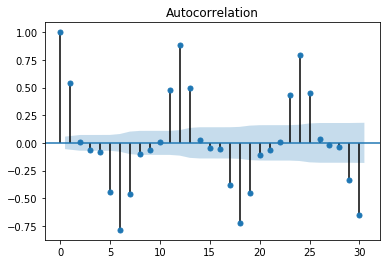

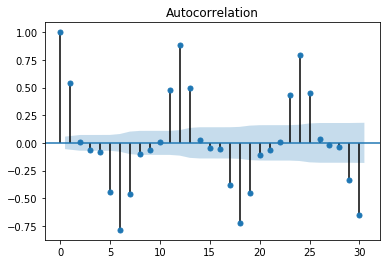

In [93]:
#To find the values of p, q, we need to ACF & PACF. The input time series for ACF & PACF is stationary series
smt.graphics.plot_acf(ln_sales_ts_diff2.dropna(), lags=30,  alpha=0.5)

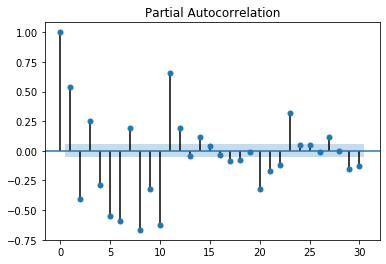

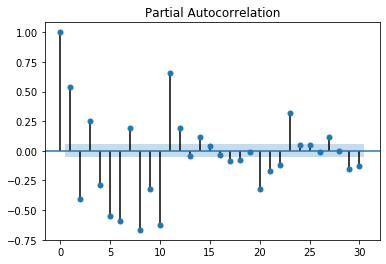

In [94]:
smt.graphics.plot_pacf(ln_sales_ts_diff2.dropna(), lags=30, alpha=0.5, method='ols')

In [44]:
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(ln_sales_ts, order = (1,2,1), seasonal_order= (1,0,1,12),
                                             enforce_stationarity=False,
                                             enforce_invertibility=False).fit()

C:\Users\om\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [45]:
print(model.summary())

                                 Statespace Model Results                                 
Dep. Variable:                      Tractor_Sales   No. Observations:                  144
Model:             SARIMAX(1, 2, 1)x(1, 0, 1, 12)   Log Likelihood                 234.891
Date:                            Sat, 22 Feb 2020   AIC                           -459.781
Time:                                    10:16:09   BIC                           -445.521
Sample:                                01-01-2003   HQIC                          -453.987
                                     - 12-01-2014                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3580      0.073     -4.908      0.000      -0.501      -0.215
ma.L1         -1.0000     84.827   

In [46]:
import sys
import itertools
import warnings

def auto_arima(timeseries, regressors=None, p=range(0, 2), d=range(0, 2), q=range(0, 2),
              P=range(0, 2), D=range(0, 1), Q=range(0, 2)):

    # Generate all different combinations of p, d and q triplets
    pdq = list(itertools.product(p, d, q))

    # Generate all different combinations of seasonal p, q and q triplets
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]
    
    warnings.filterwarnings("ignore") # specify to ignore warning messages

    best_aic = np.inf
    best_pdq = None
    best_seasonal_pdq = None
    best_results = None
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:

            try:
                temp_model = sm.tsa.statespace.SARIMAX(endog=timeseries,
                                                 exog=regressors,
                                                 order = param,
                                                 seasonal_order = param_seasonal,
                                                 enforce_stationarity=False,
                                                 enforce_invertibility=False)
                temp_results = temp_model.fit()

                print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, temp_results.aic))
                
                if temp_results.aic < best_aic:
                    best_aic = temp_results.aic
                    best_pdq = param
                    best_seasonal_pdq = param_seasonal
                    best_results = temp_results
                
            except:
                #print("Unexpected error:", sys.exc_info()[0])
                continue
    print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))
    print(best_results.summary().tables[0])
    print(best_results.summary().tables[1])
    #return best_results

In [47]:
best_results = auto_arima(ln_sales_ts,  p=range(0, 3), d=range(2, 3), q=range(0, 3),
                         P=range(0, 2), D=range(0, 1), Q=range(0, 2))

SARIMAX(0, 2, 0)x(0, 0, 0, 12)12 - AIC:-94.33654573138548
SARIMAX(0, 2, 0)x(0, 0, 1, 12)12 - AIC:-179.84996263364133
SARIMAX(0, 2, 0)x(1, 0, 0, 12)12 - AIC:-306.07485936094577
SARIMAX(0, 2, 0)x(1, 0, 1, 12)12 - AIC:-330.82169805884126
SARIMAX(0, 2, 1)x(0, 0, 0, 12)12 - AIC:-164.14045634884314
SARIMAX(0, 2, 1)x(0, 0, 1, 12)12 - AIC:-251.69132332341547
SARIMAX(0, 2, 1)x(1, 0, 0, 12)12 - AIC:-424.8156264047842
SARIMAX(0, 2, 1)x(1, 0, 1, 12)12 - AIC:-446.22576978126256
SARIMAX(0, 2, 2)x(0, 0, 0, 12)12 - AIC:-163.11646163074374
SARIMAX(0, 2, 2)x(0, 0, 1, 12)12 - AIC:-248.91004211538916
SARIMAX(0, 2, 2)x(1, 0, 0, 12)12 - AIC:-438.08926785813105
SARIMAX(0, 2, 2)x(1, 0, 1, 12)12 - AIC:-456.97281016300104
SARIMAX(1, 2, 0)x(0, 0, 0, 12)12 - AIC:-118.51978382544985
SARIMAX(1, 2, 0)x(0, 0, 1, 12)12 - AIC:-209.08519150916413
SARIMAX(1, 2, 0)x(1, 0, 0, 12)12 - AIC:-375.8571146311243
SARIMAX(1, 2, 0)x(1, 0, 1, 12)12 - AIC:-399.2450288816351
SARIMAX(1, 2, 1)x(0, 0, 0, 12)12 - AIC:-164.6015803267893
SA

In [48]:
fct = np.exp(model.forecast(12))

In [49]:
pred_dynamic = model.get_prediction(start=pd.to_datetime('2014-01-01'), full_results=True)

In [50]:
actual_1year = ts['2014-01-01':]
actual_1year

2014-01-01    525
2014-02-01    520
2014-03-01    587
2014-04-01    710
2014-05-01    793
2014-06-01    749
2014-07-01    871
2014-08-01    848
2014-09-01    640
2014-10-01    581
2014-11-01    519
2014-12-01    605
Freq: MS, Name: Tractor_Sales, dtype: int64

In [51]:
pred_1year = np.exp(pred_dynamic.predicted_mean)
pred_1year

2014-01-01    529.466657
2014-02-01    529.226102
2014-03-01    645.192285
2014-04-01    649.615338
2014-05-01    774.141885
2014-06-01    768.640413
2014-07-01    858.700801
2014-08-01    875.913699
2014-09-01    643.208615
2014-10-01    558.505288
2014-11-01    531.384231
2014-12-01    617.382765
Freq: MS, dtype: float64

In [52]:
np.mean(np.abs(actual_1year-pred_1year)/actual_1year)

0.03296124018840583

In [53]:
model.forecast(36)

2015-01-01    6.336200
2015-02-01    6.332776
2015-03-01    6.505429
2015-04-01    6.628929
2015-05-01    6.750657
2015-06-01    6.703391
2015-07-01    6.843252
2015-08-01    6.838338
2015-09-01    6.549337
2015-10-01    6.431216
2015-11-01    6.337631
2015-12-01    6.495890
2016-01-01    6.424652
2016-02-01    6.421470
2016-03-01    6.594997
2016-04-01    6.719250
2016-05-01    6.841627
2016-06-01    6.793765
2016-07-01    6.934434
2016-08-01    6.929237
2016-09-01    6.637802
2016-10-01    6.518540
2016-11-01    6.424000
2016-12-01    6.583208
2017-01-01    6.511185
2017-02-01    6.507731
2017-03-01    6.682323
2017-04-01    6.807269
2017-05-01    6.930325
2017-06-01    6.881853
2017-07-01    7.023339
2017-08-01    7.017855
2017-09-01    6.723968
2017-10-01    6.603557
2017-11-01    6.508054
2017-12-01    6.668220
Freq: MS, dtype: float64

## Multivariate Time Series ANalysis

In [54]:
mkt_sales_data = pd.read_csv('sales-and-marketing.csv')

mkt_sales_data.head()

,Time Period,Sales,Marketing Expense
0,Jan-11,397,486.64
1,Feb-11,400,501.80
2,Mar-11,498,437.09
3,Apr-11,536,565.16
4,May-11,596,744.15


In [55]:
# since the complete date was not mentioned, we assume that it was the first of every month
mkt_sales_data.set_index(pd.date_range(start='2011-01-01', freq='MS', periods=len(mkt_sales_data)), inplace=True)
mkt_sales_data.drop(['Time Period'], axis=1, inplace=True)
mkt_sales_data.rename(columns={'Sales':'Tractor-Sales'}, inplace=True)
mkt_sales_data.head(5)

,Tractor-Sales,Marketing Expense
2011-01-01,397,486.64
2011-02-01,400,501.80
2011-03-01,498,437.09
2011-04-01,536,565.16
2011-05-01,596,744.15


In [56]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(mkt_sales_data['Tractor-Sales'])
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  1.434334
p-value                         0.997265
#lags Used                     10.000000
Number of Observations Used    37.000000
Critical Value (1%)            -3.620918
Critical Value (5%)            -2.943539
Critical Value (10%)           -2.610400
dtype: float64


In [57]:
mkt_sales_data_diff = mkt_sales_data.diff(periods=1)
mkt_sales_data_diff.dropna(inplace=True)

In [58]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(mkt_sales_data_diff['Tractor-Sales'])
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -7.015650e+00
p-value                        6.743731e-10
#lags Used                     1.000000e+01
Number of Observations Used    3.600000e+01
Critical Value (1%)           -3.626652e+00
Critical Value (5%)           -2.945951e+00
Critical Value (10%)          -2.611671e+00
dtype: float64


In [59]:
mkt_sales_data['Mkt_Exp_Lag_1'] = mkt_sales_data['Marketing Expense'].shift(1)
mkt_sales_data['Mkt_Exp_Lag_2'] = mkt_sales_data['Marketing Expense'].shift(2)
mkt_sales_data['Mkt_Exp_Lag_3'] = mkt_sales_data['Marketing Expense'].shift(3)
mkt_sales_data['Mkt_Exp_Lag_4'] = mkt_sales_data['Marketing Expense'].shift(4)

In [60]:
mkt_sales_data.head(10)

,Tractor-Sales,Marketing Expense,Mkt_Exp_Lag_1,Mkt_Exp_Lag_2,Mkt_Exp_Lag_3,Mkt_Exp_Lag_4
2011-01-01,397,486.64,NaN,NaN,NaN,NaN
2011-02-01,400,501.80,486.64,NaN,NaN,NaN
2011-03-01,498,437.09,501.80,486.64,NaN,NaN
2011-04-01,536,565.16,437.09,501.80,486.64,NaN
2011-05-01,596,744.15,565.16,437.09,501.80,486.64
2011-06-01,591,548.74,744.15,565.16,437.09,501.80
2011-07-01,651,650.21,548.74,744.15,565.16,437.09
2011-08-01,654,777.51,650.21,548.74,744.15,565.16
2011-09-01,509,547.11,777.51,650.21,548.74,744.15
2011-10-01,437,382.81,547.11,777.51,650.21,548.74


In [64]:
mkt_sales_data['mkt_sales_diff'] = mkt_sales_data['Tractor-Sales'].diff(periods=1)

In [65]:
mkt_sales_data.head(10)

,Tractor-Sales,Marketing Expense,Mkt_Exp_Lag_1,Mkt_Exp_Lag_2,Mkt_Exp_Lag_3,Mkt_Exp_Lag_4,mkt_sales_diff
2011-01-01,397,486.64,NaN,NaN,NaN,NaN,NaN
2011-02-01,400,501.80,486.64,NaN,NaN,NaN,3.0
2011-03-01,498,437.09,501.80,486.64,NaN,NaN,98.0
2011-04-01,536,565.16,437.09,501.80,486.64,NaN,38.0
2011-05-01,596,744.15,565.16,437.09,501.80,486.64,60.0
2011-06-01,591,548.74,744.15,565.16,437.09,501.80,-5.0
2011-07-01,651,650.21,548.74,744.15,565.16,437.09,60.0
2011-08-01,654,777.51,650.21,548.74,744.15,565.16,3.0
2011-09-01,509,547.11,777.51,650.21,548.74,744.15,-145.0
2011-10-01,437,382.81,547.11,777.51,650.21,548.74,-72.0


In [66]:
mkt_sales_data.corr()

,Tractor-Sales,Marketing Expense,Mkt_Exp_Lag_1,Mkt_Exp_Lag_2,Mkt_Exp_Lag_3,Mkt_Exp_Lag_4,mkt_sales_diff
Tractor-Sales,1.000000,0.800679,0.592245,0.272188,-0.051202,-0.257012,0.306496
Marketing Expense,0.800679,1.000000,0.627420,0.387506,0.141520,-0.130755,0.019506
Mkt_Exp_Lag_1,0.592245,0.627420,1.000000,0.627390,0.387459,0.145967,-0.334741
Mkt_Exp_Lag_2,0.272188,0.387506,0.627390,1.000000,0.627829,0.398619,-0.482671
Mkt_Exp_Lag_3,-0.051202,0.141520,0.387459,0.627829,1.000000,0.634986,-0.469575
Mkt_Exp_Lag_4,-0.257012,-0.130755,0.145967,0.398619,0.634986,1.000000,-0.291228
mkt_sales_diff,0.306496,0.019506,-0.334741,-0.482671,-0.469575,-0.291228,1.000000


In [67]:
mkt_sales_data.dropna(inplace=True)
mkt_sales_data.head()

,Tractor-Sales,Marketing Expense,Mkt_Exp_Lag_1,Mkt_Exp_Lag_2,Mkt_Exp_Lag_3,Mkt_Exp_Lag_4,mkt_sales_diff
2011-05-01,596,744.15,565.16,437.09,501.80,486.64,60.0
2011-06-01,591,548.74,744.15,565.16,437.09,501.80,-5.0
2011-07-01,651,650.21,548.74,744.15,565.16,437.09,60.0
2011-08-01,654,777.51,650.21,548.74,744.15,565.16,3.0
2011-09-01,509,547.11,777.51,650.21,548.74,744.15,-145.0


In [68]:
import sys

def auto_arima(timeseries, regressors=None, p=range(0, 2), d=range(0, 2), q=range(0, 2),
              P=range(0, 2), D=range(0, 1), Q=range(0, 2)):

    # Generate all different combinations of p, d and q triplets
    pdq = list(itertools.product(p, d, q))

    # Generate all different combinations of seasonal p, q and q triplets
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]
    
    warnings.filterwarnings("ignore") # specify to ignore warning messages

    best_aic = np.inf
    best_pdq = None
    best_seasonal_pdq = None
    best_results = None
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:

            try:
                temp_model = sm.tsa.statespace.SARIMAX(endog=timeseries,
                                                 exog=regressors,
                                                 order = param,
                                                 seasonal_order = param_seasonal,
                                                 enforce_stationarity=False,
                                                 enforce_invertibility=False)
                temp_results = temp_model.fit()

                print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, temp_results.aic))
                
                if temp_results.aic < best_aic:
                    best_aic = temp_results.aic
                    best_pdq = param
                    best_seasonal_pdq = param_seasonal
                    best_results = temp_results
                
            except:
                #print("Unexpected error:", sys.exc_info()[0])
                continue
    print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))
    print(best_results.summary().tables[0])
    print(best_results.summary().tables[1])

In [69]:
#ARIMA Model with 2 months Lag Marekting Sales Data Regressor
timeseries = mkt_sales_data["Tractor-Sales"]
regressors = mkt_sales_data[["Marketing Expense", "Mkt_Exp_Lag_1", "Mkt_Exp_Lag_2"]]

In [70]:
best_results = auto_arima(timeseries, regressors, p=range(0, 2), d=range(0, 2), q=range(0, 2),
                         P=range(0, 2), D=range(0, 1), Q=range(0, 2))

SARIMAX(0, 0, 0)x(0, 0, 0, 12)12 - AIC:510.82257049390313
SARIMAX(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1286.690426434261
SARIMAX(0, 0, 0)x(1, 0, 0, 12)12 - AIC:310.03587577874487
SARIMAX(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1329.715956172716
SARIMAX(0, 0, 1)x(0, 0, 0, 12)12 - AIC:486.8111334845071
SARIMAX(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2278.8445948487056
SARIMAX(0, 0, 1)x(1, 0, 0, 12)12 - AIC:306.1385210698798
SARIMAX(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2476.0652185921012
SARIMAX(0, 1, 0)x(0, 0, 0, 12)12 - AIC:488.13235101885255
SARIMAX(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1227.178444221271
SARIMAX(0, 1, 0)x(1, 0, 0, 12)12 - AIC:298.76401519823384
SARIMAX(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1277.112410356121
SARIMAX(0, 1, 1)x(0, 0, 0, 12)12 - AIC:474.6219727552908
SARIMAX(0, 1, 1)x(0, 0, 1, 12)12 - AIC:2099.4985242749763
SARIMAX(0, 1, 1)x(1, 0, 0, 12)12 - AIC:289.71267963158135
SARIMAX(0, 1, 1)x(1, 0, 1, 12)12 - AIC:nan
SARIMAX(1, 0, 0)x(0, 0, 0, 12)12 - AIC:499.88478513722004
SARIMAX(1, 0, 0)x(0, 0, 1, 12)12 - A

In [71]:
best_model = sm.tsa.statespace.SARIMAX(timeseries,
                                      exog = regressors,
                                      order=(1, 1, 0),
                                      seasonal_order=(1, 0, 0, 12),
                                      enforce_stationarity=False,
                                      enforce_invertibility=False)
best_results = best_model.fit()

In [72]:
print(best_results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                      Tractor-Sales   No. Observations:                   44
Model:             SARIMAX(1, 1, 0)x(1, 0, 0, 12)   Log Likelihood                -135.148
Date:                            Sat, 22 Feb 2020   AIC                            282.295
Time:                                    10:29:25   BIC                            290.702
Sample:                                05-01-2011   HQIC                           284.985
                                     - 12-01-2014                                         
Covariance Type:                              opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Marketing Expense     0.0016      0.041      0.040      0.968      -0.080       0.083
Mkt_Exp_Lag_1 

In [73]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('2014-01-01'), full_results=True)

pred_dynamic.predicted_mean

2014-01-01    532.391295
2014-02-01    528.597686
2014-03-01    641.437131
2014-04-01    659.654432
2014-05-01    782.822439
2014-06-01    768.296026
2014-07-01    858.327970
2014-08-01    875.595191
2014-09-01    649.548062
2014-10-01    564.844681
2014-11-01    537.329170
2014-12-01    625.703264
Freq: MS, dtype: float64

In [74]:
forecast = pred_dynamic.predicted_mean
actual = mkt_sales_data['2014-01-01':]['Tractor-Sales']

In [75]:
MAPE_last1year = np.mean(np.abs(actual - forecast)/actual)

print('The Mean Absolute percentage error of our forecast for last two years is {}'.format(round(MAPE_last1year, 4)))

The Mean Absolute percentage error of our forecast for last two years is 0.0327


In [76]:
# Compute the mean square error
mse = ((actual - forecast) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))
print('The ROOT Mean Squared Error of our forecasts is {}'.format(np.sqrt(round(mse, 4))))

The Mean Squared Error of our forecasts is 678.4472
The ROOT Mean Squared Error of our forecasts is 26.04701902329708


In [77]:
#Forecast for next one year
Future_mkt_spend = {
    '2015-01-01' : [600, 559.75, 527.60],
    '2015-02-01' : [550, 600, 559.75],
    '2015-03-01' : [700, 550, 600],
    '2015-04-01' : [590, 700, 550],
    '2015-05-01' : [480, 590, 700],
    '2015-06-01' : [520, 480, 590],
    '2015-07-01' : [800, 520, 480],
    '2015-08-01' : [675, 800, 520],
    '2015-09-01' : [820, 675, 800],
    '2015-10-01' : [710, 820, 675],
    '2015-11-01' : [550, 710, 820],
    '2015-12-01' : [590, 550, 710]
}

In [78]:
Future_mkt_spend = pd.DataFrame(Future_mkt_spend).T

In [81]:
Future_mkt_spend

,Marketing Expense,Mkt_Exp_Lag_1,Mkt_Exp_Lag_2
2015-01-01,600.0,559.75,527.60
2015-02-01,550.0,600.00,559.75
2015-03-01,700.0,550.00,600.00
2015-04-01,590.0,700.00,550.00
2015-05-01,480.0,590.00,700.00
2015-06-01,520.0,480.00,590.00
2015-07-01,800.0,520.00,480.00
2015-08-01,675.0,800.00,520.00
2015-09-01,820.0,675.00,800.00
2015-10-01,710.0,820.00,675.00


In [80]:
Future_mkt_spend.columns = ['Marketing Expense', 'Mkt_Exp_Lag_1', 'Mkt_Exp_Lag_2']

In [82]:
#Forecast for next 12 Months
best_results.forecast(steps=12, exog=Future_mkt_spend)

2015-01-01    562.280027
2015-02-01    559.482883
2015-03-01    628.947675
2015-04-01    775.317134
2015-05-01    863.217365
2015-06-01    824.207612
2015-07-01    978.246610
2015-08-01    956.313059
2015-09-01    705.383953
2015-10-01    635.024931
2015-11-01    553.749843
2015-12-01    649.498405
Freq: MS, dtype: float64

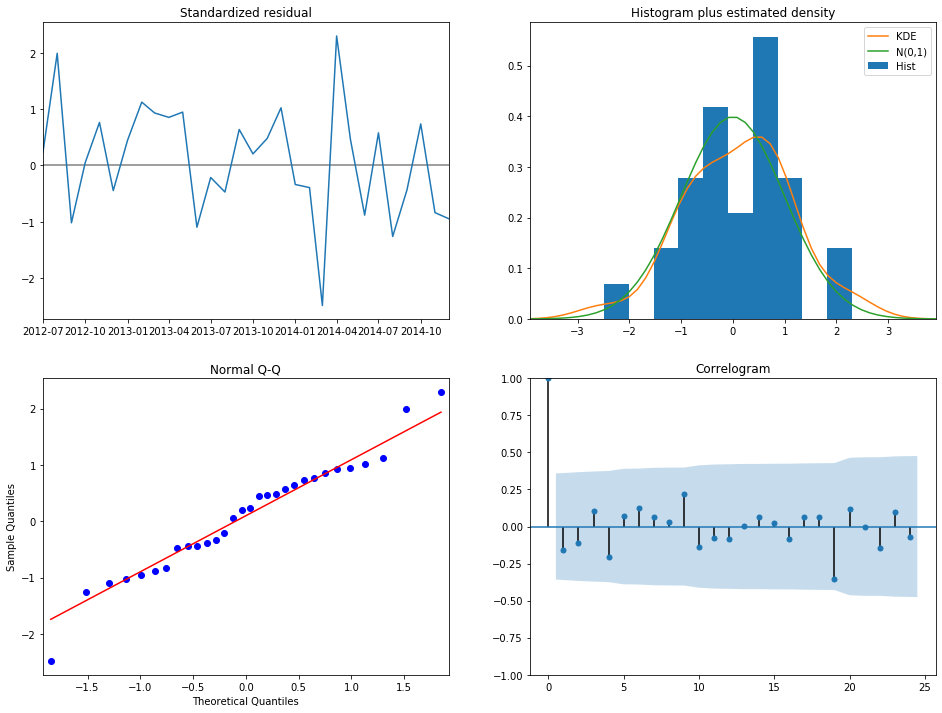

In [83]:
best_results.plot_diagnostics(lags=24, figsize=(16,12))
plt.show()